In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

# IMDb-Datensatz von Kaggle herunterladen
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# Lade den Datensatz
!wget $url -O imdb_reviews.tar.gz
!tar -xvzf imdb_reviews.tar.gz

# Beispielhafte Texte aus dem Datensatz extrahieren
import os

def load_imdb_data(num_samples=5):
    """Lädt eine kleine Menge an IMDb Reviews aus dem 'pos' und 'neg' Ordner"""
    reviews = []
    for label in ["pos", "neg"]:
        folder_path = f"aclImdb/train/{label}"
        files = os.listdir(folder_path)[:num_samples]  # Nur einige Dateien laden
        for file in files:
            with open(os.path.join(folder_path, file), "r", encoding="utf-8") as f:
                reviews.append((f.read(), label))
    return pd.DataFrame(reviews, columns=["review", "sentiment"])

# Reviews laden
df = load_imdb_data(num_samples=1000)
print(df.head())

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclImdb/train/unsup/44953_0.txt
aclImdb/train/unsup/44952_0.txt
aclImdb/train/unsup/44951_0.txt
aclImdb/train/unsup/44950_0.txt
aclImdb/train/unsup/44949_0.txt
aclIm

In [ ]:
df.head()

,review,sentiment
0,This is truly the greatest Swedish movie of al...,pos
1,"This is a very difficult movie, and it's almos...",pos
2,The Haunting is a film that boasts a really cr...,pos
3,The first 2 parts seek to reduce to absurdity ...,pos
4,This very strange movie is unlike anything mad...,pos


In [ ]:
len(df)

2000

rohe Daten X
Funktion f
f(x) = y saubere Daten

f = g * h * i * j * ...

In [ ]:
# Stelle sicher, dass "punkt" heruntergeladen wird
nltk.download("punkt")
nltk.download("punkt_tab")

def tokenize_text(text):
    return word_tokenize(text)

df["tokens"] = df["review"].apply(tokenize_text)
print(df[["review", "tokens"]].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                              review  \
0  This is truly the greatest Swedish movie of al...   
1  This is a very difficult movie, and it's almos...   
2  The Haunting is a film that boasts a really cr...   
3  The first 2 parts seek to reduce to absurdity ...   
4  This very strange movie is unlike anything mad...   

                                              tokens  
0  [This, is, truly, the, greatest, Swedish, movi...  
1  [This, is, a, very, difficult, movie, ,, and, ...  
2  [The, Haunting, is, a, film, that, boasts, a, ...  
3  [The, first, 2, parts, seek, to, reduce, to, a...  
4  [This, very, strange, movie, is, unlike, anyth...  


In [ ]:
df.head()

,review,sentiment,tokens
0,This is truly the greatest Swedish movie of al...,pos,"[This, is, truly, the, greatest, Swedish, movi..."
1,"This is a very difficult movie, and it's almos...",pos,"[This, is, a, very, difficult, movie, ,, and, ..."
2,The Haunting is a film that boasts a really cr...,pos,"[The, Haunting, is, a, film, that, boasts, a, ..."
3,The first 2 parts seek to reduce to absurdity ...,pos,"[The, first, 2, parts, seek, to, reduce, to, a..."
4,This very strange movie is unlike anything mad...,pos,"[This, very, strange, movie, is, unlike, anyth..."


In [ ]:
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def remove_stopwords(tokens):
    return [word.lower() for word in tokens if word.lower() not in stop_words]

df["tokens_no_stopwords"] = df["tokens"].apply(remove_stopwords)
print(df[["tokens", "tokens_no_stopwords"]].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              tokens  \
0  [This, is, truly, the, greatest, Swedish, movi...   
1  [This, is, a, very, difficult, movie, ,, and, ...   
2  [The, Haunting, is, a, film, that, boasts, a, ...   
3  [The, first, 2, parts, seek, to, reduce, to, a...   
4  [This, very, strange, movie, is, unlike, anyth...   

                                 tokens_no_stopwords  
0  [truly, greatest, swedish, movie, time, ., rev...  
1  [difficult, movie, ,, 's, almost, impossible, ...  
2  [haunting, film, boasts, really, creepy, house...  
3  [first, 2, parts, seek, reduce, absurdity, ris...  
4  [strange, movie, unlike, anything, made, west,...  


In [ ]:
df.head()

,review,sentiment,tokens,tokens_no_stopwords
0,This is truly the greatest Swedish movie of al...,pos,"[This, is, truly, the, greatest, Swedish, movi...","[truly, greatest, swedish, movie, time, ., rev..."
1,"This is a very difficult movie, and it's almos...",pos,"[This, is, a, very, difficult, movie, ,, and, ...","[difficult, movie, ,, 's, almost, impossible, ..."
2,The Haunting is a film that boasts a really cr...,pos,"[The, Haunting, is, a, film, that, boasts, a, ...","[haunting, film, boasts, really, creepy, house..."
3,The first 2 parts seek to reduce to absurdity ...,pos,"[The, first, 2, parts, seek, to, reduce, to, a...","[first, 2, parts, seek, reduce, absurdity, ris..."
4,This very strange movie is unlike anything mad...,pos,"[This, very, strange, movie, is, unlike, anyth...","[strange, movie, unlike, anything, made, west,..."


In [ ]:
nltk.download("wordnet")

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def apply_stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

def apply_lemmatization(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df["tokens_stemmed"] = df["tokens_no_stopwords"].apply(apply_stemming)
df["tokens_lemmatized"] = df["tokens_no_stopwords"].apply(apply_lemmatization)

print(df[["tokens_no_stopwords", "tokens_stemmed", "tokens_lemmatized"]].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...


                                 tokens_no_stopwords  \
0  [anyone, watches, film, agree, ., film, direct...   
1  [coming, shortly, imposition, morality, code, ...   
2  [(, spoilers, included, ), film, surely, best,...   
3  [back, 2004, saw, ``, true, '', ,, tom, tykwer...   
4  [good, story, ., good, script, ., good, castin...   

                                      tokens_stemmed  \
0  [anyon, watch, film, agre, ., film, direct, da...   
1  [come, shortli, imposit, moral, code, darken, ...   
2  [(, spoiler, includ, ), film, sure, best, amic...   
3  [back, 2004, saw, ``, true, '', ,, tom, tykwer...   
4  [good, stori, ., good, script, ., good, cast, ...   

                                   tokens_lemmatized  
0  [anyone, watch, film, agree, ., film, directed...  
1  [coming, shortly, imposition, morality, code, ...  
2  [(, spoiler, included, ), film, surely, best, ...  
3  [back, 2004, saw, ``, true, '', ,, tom, tykwer...  
4  [good, story, ., good, script, ., good, castin..

In [ ]:
df.head()

,review,sentiment,tokens,tokens_no_stopwords,tokens_stemmed,tokens_lemmatized
0,and anyone who watches this film will agree. T...,pos,"[and, anyone, who, watches, this, film, will, ...","[anyone, watches, film, agree, ., film, direct...","[anyon, watch, film, agre, ., film, direct, da...","[anyone, watch, film, agree, ., film, directed..."
1,Coming shortly before the imposition of a mora...,pos,"[Coming, shortly, before, the, imposition, of,...","[coming, shortly, imposition, morality, code, ...","[come, shortli, imposit, moral, code, darken, ...","[coming, shortly, imposition, morality, code, ..."
2,(SPOILERS included) This film surely is the be...,pos,"[(, SPOILERS, included, ), This, film, surely,...","[(, spoilers, included, ), film, surely, best,...","[(, spoiler, includ, ), film, sure, best, amic...","[(, spoiler, included, ), film, surely, best, ..."
3,"Back in 2004 I saw ""True"", Tom Tykwer's contri...",pos,"[Back, in, 2004, I, saw, ``, True, '', ,, Tom,...","[back, 2004, saw, ``, true, '', ,, tom, tykwer...","[back, 2004, saw, ``, true, '', ,, tom, tykwer...","[back, 2004, saw, ``, true, '', ,, tom, tykwer..."
4,Good story. Good script. Good casting. Good ac...,pos,"[Good, story, ., Good, script, ., Good, castin...","[good, story, ., good, script, ., good, castin...","[good, stori, ., good, script, ., good, cast, ...","[good, story, ., good, script, ., good, castin..."


In [ ]:
def clean_text(tokens):
    return [word for word in tokens if word.isalpha()]  # Entferne alles außer Buchstaben

df["tokens_cleaned"] = df["tokens_lemmatized"].apply(clean_text)
print(df[["tokens_lemmatized", "tokens_cleaned"]].head())

                                   tokens_lemmatized  \
0  [anyone, watch, film, agree, ., film, directed...   
1  [coming, shortly, imposition, morality, code, ...   
2  [(, spoiler, included, ), film, surely, best, ...   
3  [back, 2004, saw, ``, true, '', ,, tom, tykwer...   
4  [good, story, ., good, script, ., good, castin...   

                                      tokens_cleaned  
0  [anyone, watch, film, agree, film, directed, d...  
1  [coming, shortly, imposition, morality, code, ...  
2  [spoiler, included, film, surely, best, amicus...  
3  [back, saw, true, tom, tykwer, contribution, p...  
4  [good, story, good, script, good, casting, goo...  


In [ ]:
df.head()

,review,sentiment,tokens,tokens_no_stopwords,tokens_stemmed,tokens_lemmatized,tokens_cleaned
0,and anyone who watches this film will agree. T...,pos,"[and, anyone, who, watches, this, film, will, ...","[anyone, watches, film, agree, ., film, direct...","[anyon, watch, film, agre, ., film, direct, da...","[anyone, watch, film, agree, ., film, directed...","[anyone, watch, film, agree, film, directed, d..."
1,Coming shortly before the imposition of a mora...,pos,"[Coming, shortly, before, the, imposition, of,...","[coming, shortly, imposition, morality, code, ...","[come, shortli, imposit, moral, code, darken, ...","[coming, shortly, imposition, morality, code, ...","[coming, shortly, imposition, morality, code, ..."
2,(SPOILERS included) This film surely is the be...,pos,"[(, SPOILERS, included, ), This, film, surely,...","[(, spoilers, included, ), film, surely, best,...","[(, spoiler, includ, ), film, sure, best, amic...","[(, spoiler, included, ), film, surely, best, ...","[spoiler, included, film, surely, best, amicus..."
3,"Back in 2004 I saw ""True"", Tom Tykwer's contri...",pos,"[Back, in, 2004, I, saw, ``, True, '', ,, Tom,...","[back, 2004, saw, ``, true, '', ,, tom, tykwer...","[back, 2004, saw, ``, true, '', ,, tom, tykwer...","[back, 2004, saw, ``, true, '', ,, tom, tykwer...","[back, saw, true, tom, tykwer, contribution, p..."
4,Good story. Good script. Good casting. Good ac...,pos,"[Good, story, ., Good, script, ., Good, castin...","[good, story, ., good, script, ., good, castin...","[good, stori, ., good, script, ., good, cast, ...","[good, story, ., good, script, ., good, castin...","[good, story, good, script, good, casting, goo..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # BoW

# CountVectorizer für BoW (Nur häufige Wörter berücksichtigen)
vectorizer_bow = CountVectorizer(max_features=500)  # Wir nehmen die 500 häufigsten Wörter
X_bow = vectorizer_bow.fit_transform(df["review"])

print("BoW Shape:", X_bow.shape)

BoW Shape: (2000, 500)


In [ ]:
review_0 = [0, 0, 0, 0, ..., 1, 0, ..., 2, ..., 0] # sparse vector, frisst Speicher
review_0_alt = [(10, 1), (20, 3), (98, 1), (max_features)]
entpacke(review_0_alt) = [0, 0, 0, ..., 1, ..., 3, ..., 1, ..., 0]

In [ ]:
print(X_bow)

  (0, 25)	5
  (0, 29)	1
  (0, 471)	2
  (0, 419)	2
  (0, 149)	3
  (0, 476)	1
  (0, 454)	1
  (0, 103)	1
  (0, 213)	5
  (0, 408)	16
  (0, 93)	1
  (0, 466)	1
  (0, 330)	1
  (0, 75)	1
  (0, 9)	1
  (0, 61)	6
  (0, 217)	7
  (0, 431)	1
  (0, 33)	4
  (0, 373)	2
  (0, 297)	4
  (0, 5)	2
  (0, 157)	2
  (0, 305)	1
  (0, 308)	1
  :	:
  (1999, 499)	2
  (1999, 160)	1
  (1999, 399)	1
  (1999, 76)	3
  (1999, 215)	1
  (1999, 283)	1
  (1999, 139)	1
  (1999, 470)	1
  (1999, 303)	1
  (1999, 114)	1
  (1999, 140)	3
  (1999, 107)	1
  (1999, 333)	1
  (1999, 172)	1
  (1999, 67)	2
  (1999, 377)	1
  (1999, 232)	1
  (1999, 443)	1
  (1999, 368)	1
  (1999, 35)	1
  (1999, 119)	1
  (1999, 173)	2
  (1999, 310)	1
  (1999, 132)	1
  (1999, 359)	2


In [ ]:
print(X_bow.toarray())

[[2 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [0 0 4 ... 2 1 0]
 ...
 [1 0 0 ... 1 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 2]]


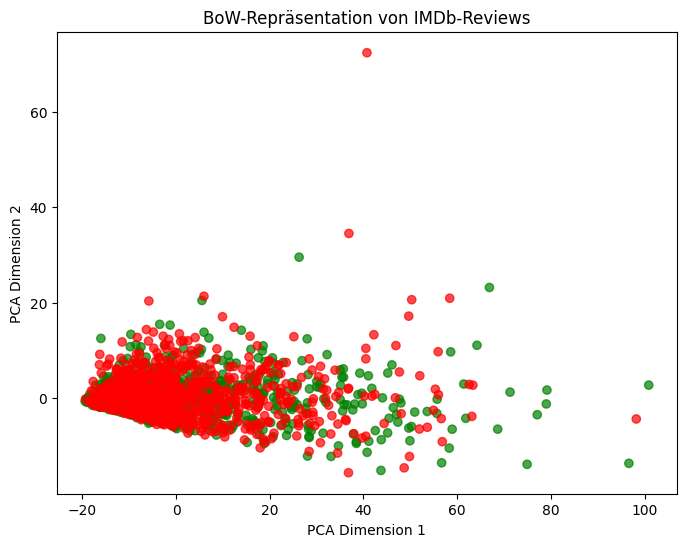

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA für BoW
pca_bow = PCA(n_components=2)
X_bow_pca = pca_bow.fit_transform(X_bow.toarray())

# Farben für Sentiments (grün = positiv, rot = negativ)
colors = ["green" if s == "pos" else "red" for s in df["sentiment"]]

# Scatterplot für BoW
plt.figure(figsize=(8, 6))
plt.scatter(X_bow_pca[:, 0], X_bow_pca[:, 1], c=colors, alpha=0.7)
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("BoW-Repräsentation von IMDb-Reviews")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF-Vektorisierung
vectorizer_tfidf = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer_tfidf.fit_transform(df["review"])

print("TF-IDF Shape:", X_tfidf.shape)

TF-IDF Shape: (2000, 500)


In [ ]:
print(X_tfidf)

  (0, 25)	0.15649168903405522
  (0, 29)	0.10226665423224438
  (0, 471)	0.10505059165492271
  (0, 419)	0.06617605879053101
  (0, 149)	0.14230754162798104
  (0, 476)	0.07032011295319632
  (0, 454)	0.04308373751431736
  (0, 103)	0.11582485964400105
  (0, 213)	0.1699936600780455
  (0, 408)	0.48646180984359777
  (0, 93)	0.12029252220656321
  (0, 466)	0.060827973137319837
  (0, 330)	0.07695134665064342
  (0, 75)	0.07702276183249766
  (0, 9)	0.08995149195245111
  (0, 61)	0.280018381964667
  (0, 217)	0.23442571932612336
  (0, 431)	0.11216430437742841
  (0, 33)	0.17657669382305408
  (0, 373)	0.1479317434599324
  (0, 297)	0.1267689552352239
  (0, 5)	0.1479317434599324
  (0, 157)	0.07971804022346164
  (0, 305)	0.06367191172577903
  (0, 308)	0.06941812831458884
  :	:
  (1999, 499)	0.0759547777982587
  (1999, 160)	0.05629235287701541
  (1999, 399)	0.04086394088094609
  (1999, 76)	0.11018803077543367
  (1999, 215)	0.04455969758589946
  (1999, 283)	0.046043843427826824
  (1999, 139)	0.042778603128771

In [ ]:
print(X_tfidf.toarray())

[[0.1801231  0.         0.         ... 0.         0.         0.        ]
 [0.0422236  0.         0.         ... 0.         0.04495255 0.        ]
 [0.         0.         0.0757592  ... 0.03274992 0.03289369 0.        ]
 ...
 [0.15162026 0.         0.         ... 0.08035705 0.16141963 0.        ]
 [0.         0.         0.         ... 0.06995542 0.         0.        ]
 [0.         0.         0.02583521 ... 0.02233659 0.         0.07595478]]


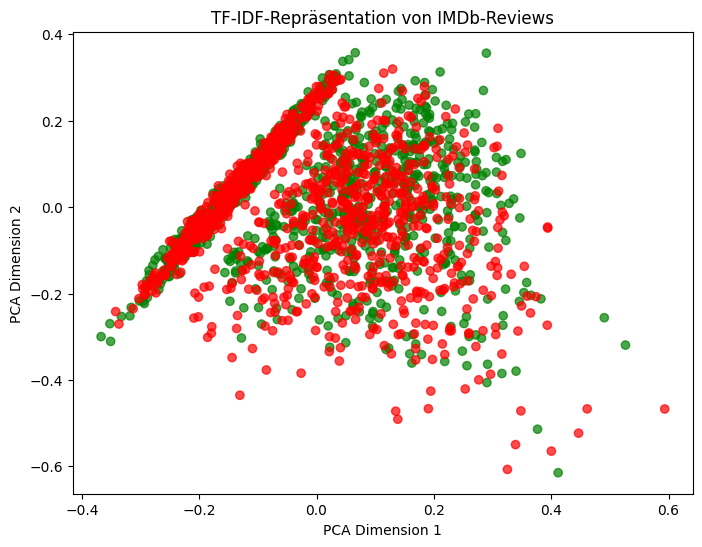

In [ ]:
# PCA für TF-IDF
pca_tfidf = PCA(n_components=2)
X_tfidf_pca = pca_tfidf.fit_transform(X_tfidf.toarray())

# Scatterplot für TF-IDF
plt.figure(figsize=(8, 6))
plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c=colors, alpha=0.7)
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("TF-IDF-Repräsentation von IMDb-Reviews")
plt.show()

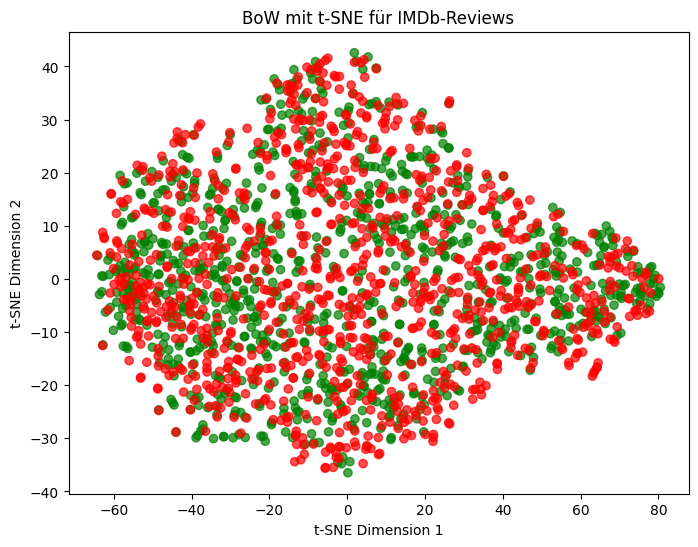

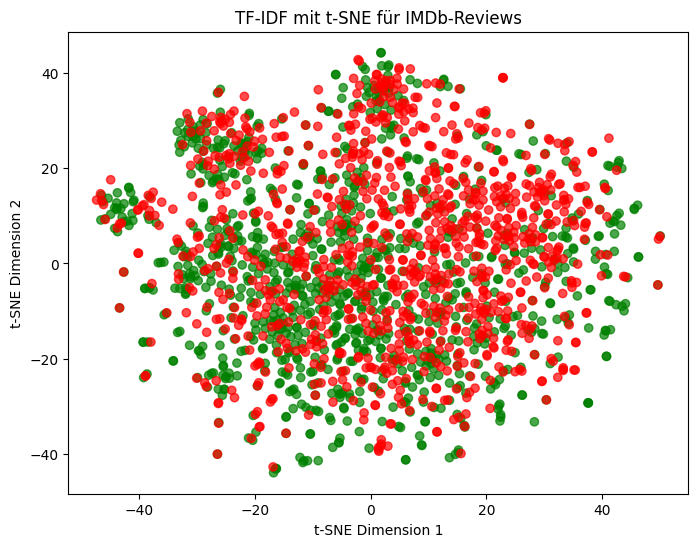

In [ ]:
from sklearn.manifold import TSNE

# t-SNE für BoW
tsne_bow = TSNE(n_components=2, perplexity=10, random_state=42)
X_bow_tsne = tsne_bow.fit_transform(X_bow.toarray())

# Scatterplot für BoW mit t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_bow_tsne[:, 0], X_bow_tsne[:, 1], c=colors, alpha=0.7)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("BoW mit t-SNE für IMDb-Reviews")
plt.show()

# t-SNE für TF-IDF
tsne_tfidf = TSNE(n_components=2, perplexity=10, random_state=42)
X_tfidf_tsne = tsne_tfidf.fit_transform(X_tfidf.toarray())

# Scatterplot für TF-IDF mit t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tfidf_tsne[:, 0], X_tfidf_tsne[:, 1], c=colors, alpha=0.7)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("TF-IDF mit t-SNE für IMDb-Reviews")
plt.show()

In [ ]:
import gensim.downloader as api

# Lade vortrainierte Word2Vec-Embeddings (Google News 300D)
w2v_model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import numpy as np

# Funktion, um einen Satz in einen Vektor zu transformieren (Mittelwert aller Wortvektoren)
def sentence_to_w2v(sentence):
    words = sentence.split()
    word_vectors = [w2v_model[word] for word in words if word in w2v_model]
    if len(word_vectors) == 0:
        return np.zeros(300)  # Falls kein Wort im Vokabular ist, geben wir Nullvektor zurück
    return np.mean(word_vectors, axis=0)

# Repräsentiere alle Reviews als Word2Vec-Vektoren
X_w2v = np.array([sentence_to_w2v(review) for review in df["review"]])

print("Word2Vec Shape:", X_w2v.shape)  # Erwartet: (10, 300) -> 10 Sätze mit 300D-Embeddings

Word2Vec Shape: (2000, 300)


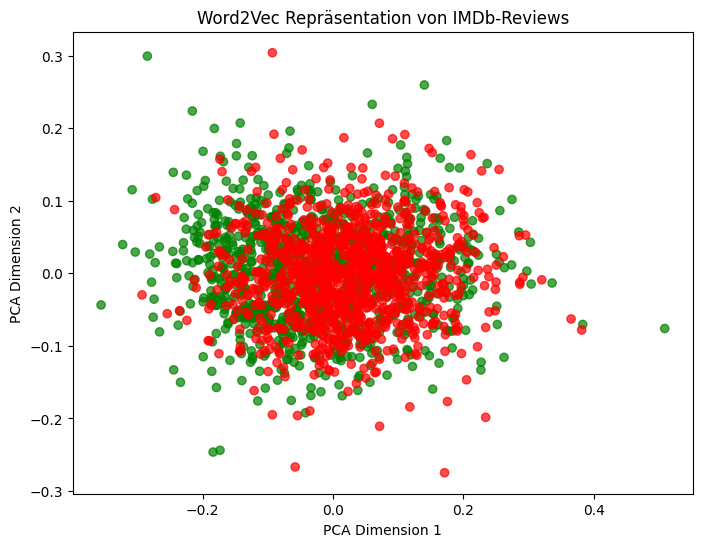

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduziere Word2Vec-Vektoren auf 2D mit PCA
pca = PCA(n_components=2)
X_w2v_pca = pca.fit_transform(X_w2v)

# Farben basierend auf Sentiment setzen (pos = grün, neg = rot)
colors = ["green" if s == "pos" else "red" for s in df["sentiment"]]

# 2D-Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(X_w2v_pca[:, 0], X_w2v_pca[:, 1], c=colors, alpha=0.7)
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("Word2Vec Repräsentation von IMDb-Reviews")
plt.show()

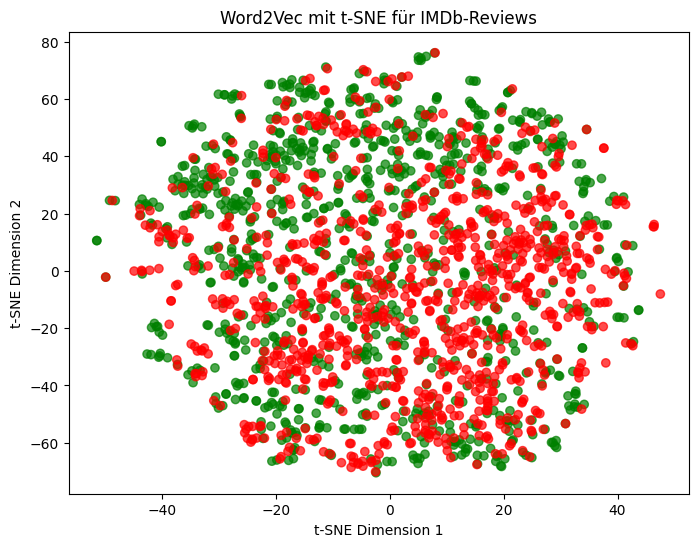

In [ ]:
from sklearn.manifold import TSNE

# Reduziere auf 2D mit t-SNE (besser für komplexe Strukturen)
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_w2v_tsne = tsne.fit_transform(X_w2v)

# 2D-Scatterplot mit t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_w2v_tsne[:, 0], X_w2v_tsne[:, 1], c=colors, alpha=0.7)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("Word2Vec mit t-SNE für IMDb-Reviews")
plt.show()

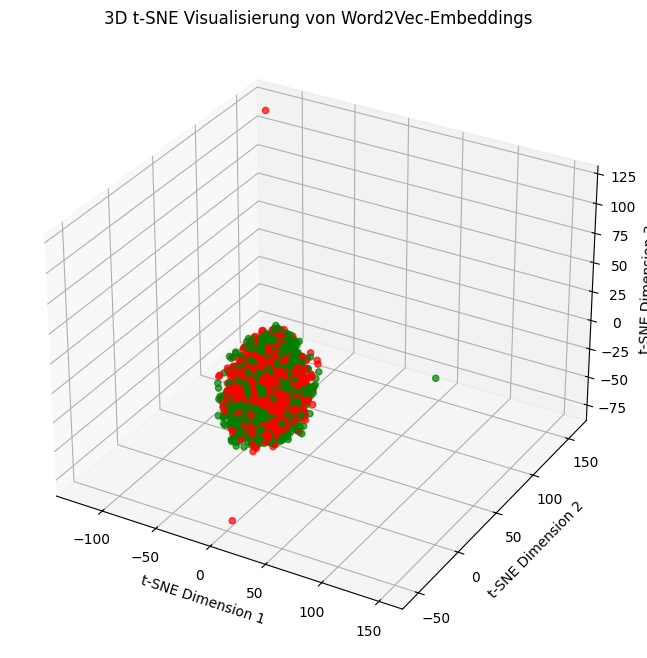

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reduziere Word2Vec-Vektoren von 300D auf 3D mit t-SNE
tsne_w2v_3d = TSNE(n_components=3, perplexity=10, random_state=42)
X_w2v_tsne_3d = tsne_w2v_3d.fit_transform(X_w2v)

# Farben für Sentiments (grün = positiv, rot = negativ)
colors = ["green" if s == "pos" else "red" for s in df["sentiment"]]

# 3D-Plot erzeugen
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Punkte plotten
ax.scatter(X_w2v_tsne_3d[:, 0], X_w2v_tsne_3d[:, 1], X_w2v_tsne_3d[:, 2], c=colors, alpha=0.7)

# Achsenbeschriftungen
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
ax.set_title("3D t-SNE Visualisierung von Word2Vec-Embeddings")

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Labels (Sentiment-Klassen) als numerische Werte umwandeln
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["sentiment"])  # pos → 1, neg → 0

# Trainings- & Test-Daten aufteilen (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

print(f"Trainingsdaten: {X_train.shape}, Testdaten: {X_test.shape}")

Trainingsdaten: (1600, 300), Testdaten: (400, 300)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Modell-Dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel="linear"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Modelle trainieren & bewerten
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Genauigkeit = {acc:.4f}")

Logistic Regression: Genauigkeit = 0.7900
SVM: Genauigkeit = 0.7900
Random Forest: Genauigkeit = 0.7700
KNN: Genauigkeit = 0.7175


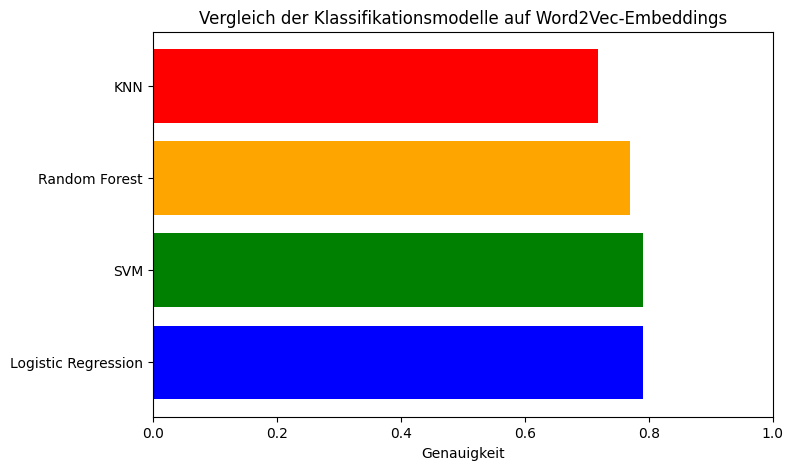

In [ ]:
import matplotlib.pyplot as plt

# Ergebnisse speichern
model_names = list(models.keys())
accuracies = [accuracy_score(y_test, models[name].predict(X_test)) for name in model_names]

# Balkendiagramm plotten
plt.figure(figsize=(8, 5))
plt.barh(model_names, accuracies, color=["blue", "green", "orange", "red"])
plt.xlabel("Genauigkeit")
plt.title("Vergleich der Klassifikationsmodelle auf Word2Vec-Embeddings")
plt.xlim(0, 1)
plt.show()

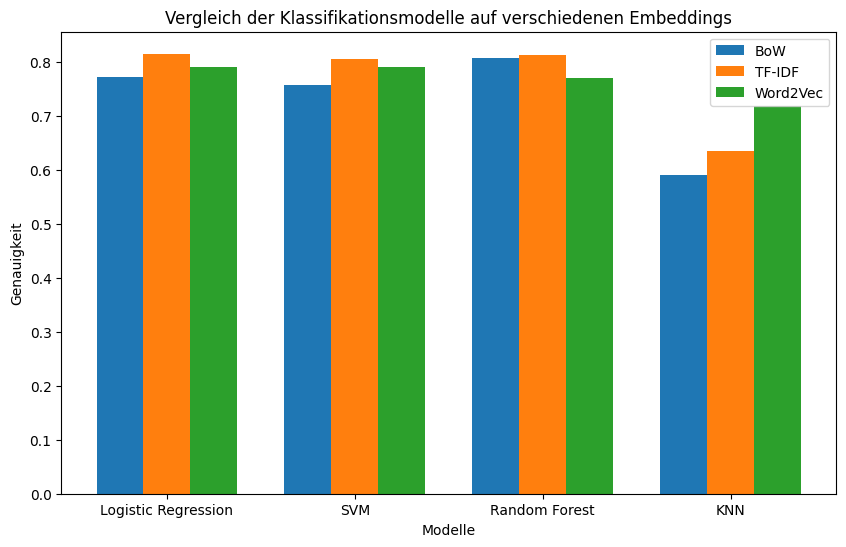

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Funktion zum Trainieren und Evaluieren der Modelle
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM": SVC(kernel="linear"),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "KNN": KNeighborsClassifier(n_neighbors=5)
    }

    accuracies = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies[name] = accuracy_score(y_test, y_pred)

    return accuracies

# Labels vorbereiten
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["sentiment"])

# Modelle auf allen drei Embeddings testen
accuracies_bow = train_and_evaluate(X_bow.toarray(), y)
accuracies_tfidf = train_and_evaluate(X_tfidf.toarray(), y)
accuracies_w2v = train_and_evaluate(X_w2v, y)

# Daten für Plot vorbereiten
model_names = list(accuracies_bow.keys())
accuracy_values = {
    "BoW": [accuracies_bow[m] for m in model_names],
    "TF-IDF": [accuracies_tfidf[m] for m in model_names],
    "Word2Vec": [accuracies_w2v[m] for m in model_names]
}

# Balkendiagramm plotten
x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracy_values["BoW"], width, label="BoW")
ax.bar(x, accuracy_values["TF-IDF"], width, label="TF-IDF")
ax.bar(x + width, accuracy_values["Word2Vec"], width, label="Word2Vec")

ax.set_xlabel("Modelle")
ax.set_ylabel("Genauigkeit")
ax.set_title("Vergleich der Klassifikationsmodelle auf verschiedenen Embeddings")
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()